In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('Datasets/iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [4]:

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0



# drop the id column which we don't need

In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

# optional step but will be predictive

In [8]:
df.loc[df.Species==0,'Species']='Setosa'
df.loc[df.Species==1,'Species']='Versicolor'
df.loc[df.Species==2,'Species']='Virginica'

In [9]:
df.Species.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

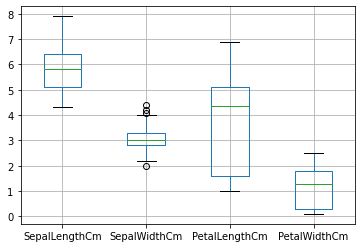

In [12]:

df.boxplot()

# seperate predictor and outcome

In [13]:
x=df.iloc[:,:-1]
y=df.Species

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
y_predict=model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,y_predict)

1.0

In [19]:
pd.crosstab(y_test,y_predict)

col_0,Setosa,Versicolor,Virginica
Species,,,
Setosa,10,0,0
Versicolor,0,13,0
Virginica,0,0,7


# export the model

In [20]:
import joblib{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "beab1813",
   "metadata": {},
   "outputs": [],
   "source": [
    "import pandas as pd"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "id": "2d9b5301",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Id</th>\n",
       "      <th>SepalLengthCm</th>\n",
       "      <th>SepalWidthCm</th>\n",
       "      <th>PetalLengthCm</th>\n",
       "      <th>PetalWidthCm</th>\n",
       "      <th>Species</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1</td>\n",
       "      <td>5.1</td>\n",
       "      <td>3.5</td>\n",
       "      <td>1.4</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>2</td>\n",
       "      <td>4.9</td>\n",
       "      <td>3.0</td>\n",
       "      <td>1.4</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>3</td>\n",
       "      <td>4.7</td>\n",
       "      <td>3.2</td>\n",
       "      <td>1.3</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>4</td>\n",
       "      <td>4.6</td>\n",
       "      <td>3.1</td>\n",
       "      <td>1.5</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>5</td>\n",
       "      <td>5.0</td>\n",
       "      <td>3.6</td>\n",
       "      <td>1.4</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n
       "</div>"
      ],
      "text/plain": [
       "   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species\n",
       "0   1            5.1           3.5            1.4           0.2        0\n",
       "1   2            4.9           3.0            1.4           0.2        0\n",
       "2   3            4.7           3.2            1.3           0.2        0\n",
       "3   4            4.6           3.1            1.5           0.2        0\n",
       "4   5            5.0           3.6            1.4           0.2        0"
      ]
     },
     "execution_count": 2,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df = pd.read_csv('iris.csv')\n",
    "df.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "1b8b2df2",
   "metadata": {},
   "outputs": [],
   "source": [
    "df.drop('Id', axis=1, inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "e9d8f38b",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>SepalLengthCm</th>\n",
       "      <th>SepalWidthCm</th>\n",
       "      <th>PetalLengthCm</th>\n",
       "      <th>PetalWidthCm</th>\n",
       "      <th>Species</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>5.1</td>\n",
       "      <td>3.5</td>\n",
       "      <td>1.4</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>4.9</td>\n",
       "      <td>3.0</td>\n",
       "      <td>1.4</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>4.7</td>\n",
       "      <td>3.2</td>\n",
       "      <td>1.3</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>4.6</td>\n",
       "      <td>3.1</td>\n",
       "      <td>1.5</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>5.0</td>\n",
       "      <td>3.6</td>\n",
       "      <td>1.4</td>\n",
       "      <td>0.2</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species\n",
       "0            5.1           3.5            1.4           0.2        0\n",
       "1            4.9           3.0            1.4           0.2        0\n",
       "2            4.7           3.2            1.3           0.2        0\n",
       "3            4.6           3.1            1.5           0.2        0\n",
       "4            5.0           3.6            1.4           0.2        0"
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "76ca7017",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([0, 1, 2], dtype=int64)"
      ]
     },
     "execution_count": 5,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.Species.unique()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "id": "32d4194e",
   "metadata": {},
   "outputs": [],
   "source": [
    "# optional\n",
    "df.loc[df.Species==0, 'Species' ] = 'Setosa'\n",
    "df.loc[df.Species==1, 'Species' ] = 'Versicolor'\n",
    "df.loc[df.Species==2, 'Species' ] = 'Virginica'"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "id": "37d2f96f",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)"
      ]
     },
     "execution_count": 17,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.Species.unique()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "id": "e22b61a1",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>SepalLengthCm</th>\n",
       "      <th>SepalWidthCm</th>\n",
       "      <th>PetalLengthCm</th>\n",
       "      <th>PetalWidthCm</th>\n",
       "      <th>Species</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>5.1</td>\n",
       "      <td>3.5</td>\n",
       "      <td>1.4</td>\n",
       "      <td>0.2</td>\n",
       "      <td>Setosa</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>4.9</td>\n",
       "      <td>3.0</td>\n",
       "      <td>1.4</td>\n",
       "      <td>0.2</td>\n",
       "      <td>Setosa</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>4.7</td>\n",
       "      <td>3.2</td>\n",
       "      <td>1.3</td>\n",
       "      <td>0.2</td>\n",
       "      <td>Setosa</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>4.6</td>\n",
       "      <td>3.1</td>\n",
       "      <td>1.5</td>\n",
       "      <td>0.2</td>\n",
       "      <td>Setosa</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>5.0</td>\n",
       "      <td>3.6</td>\n",
       "      <td>1.4</td>\n",
       "      <td>0.2</td>\n",
       "      <td>Setosa</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species\n",
       "0            5.1           3.5            1.4           0.2  Setosa\n",
       "1            4.9           3.0            1.4           0.2  Setosa\n",
       "2            4.7           3.2            1.3           0.2  Setosa\n",
       "3            4.6           3.1            1.5           0.2  Setosa\n",
       "4            5.0           3.6            1.4           0.2  Setosa"
      ]
     },
     "execution_count": 18,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "id": "5e4bff6e",
   "metadata": {},
   "outputs": [],
   "source": [
    "X = df.iloc[:, :-1]\n",
    "y =  df.Species"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "id": "5e0b56f5",
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.model_selection import train_test_split\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.2)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 21,
   "id": "ef986fab",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "RandomForestClassifier()"
      ]
     },
     "execution_count": 21,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "from sklearn.ensemble import RandomForestClassifier\n",
    "model = RandomForestClassifier()\n",
    "model.fit(X_train, y_train)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 22,
   "id": "e1978dee",
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.metrics import accuracy_score\n",
    "y_predict = model.predict(X_test)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 23,
   "id": "a9131756",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.9666666666666667"
      ]
     },
     "execution_count": 23,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "accuracy_score(y_test, y_predict)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 24,
   "id": "7475ed46",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th>col_0</th>\n",
       "      <th>Setosa</th>\n",
       "      <th>Versicolor</th>\n",
       "      <th>Virginica</th>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Species</th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>Setosa</th>\n",
       "      <td>10</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Versicolor</th>\n",
       "      <td>0</td>\n",
       "      <td>12</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Virginica</th>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>7</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "col_0       Setosa  Versicolor  Virginica\n",
       "Species                                  \n",
       "Setosa          10           0          0\n",
       "Versicolor       0          12          1\n",
       "Virginica        0           0          7"
      ]
     },
     "execution_count": 24,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "pd.crosstab(y_test, y_predict)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 25,
   "id": "8f21b70e",
   "metadata": {},
   "outputs": [],
   "source": [
    "import joblib"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 26,
   "id": "46cb57c4",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "['deployment.pkl']"
      ]
     },
     "execution_count": 26,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "joblib.dump(model, 'deployment.pkl')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 27,
   "id": "1a49f57d",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "'C:\\\\Users\\\\suhai'"
      ]
     },
     "execution_count": 27,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "pwd"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "f67ee5bd",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.9.7"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}


In [21]:
joblib.dump(model,'deployment.pkl')

['deployment.pkl']

In [22]:
pwd

'C:\\Users\\SA'